In [1]:
%matplotlib inline
import numpy as np
from scipy import integrate, interpolate
import matplotlib.pyplot as plt
np.random.SEED = 42

In [2]:
n_samples = 5 * np.ones(4, dtype=int)
dose = np.array([-0.86,-0.3,-.05,.73])
deaths = np.array([0,1,3,5])

In [7]:
def invlogit(x):
    return np.exp(x)/(1+np.exp(x))

In [4]:
def p_posterior(alpha,beta,dose,obs_deaths,n):
    p = []
    for dose_i,obs_deaths_i,n_i in zip(dose,obs_deaths,n):
        theta_i = invlogit(alpha+beta*dose_i)
        p.append(theta_i**obs_deaths_i*(1-theta_i)**(n_i-obs_deaths_i))
    p = np.array(p)
    return np.prod(p,axis=0)
        

In [8]:
delta = 0.1
alpha = np.arange(-5.0,10+delta,delta)
beta = np.arange(-10,40+delta,delta)

ALPHA, BETA = np.meshgrid(alpha,beta)
p = p_posterior(ALPHA, BETA, dose, deaths, n_samples)

(0, 25)

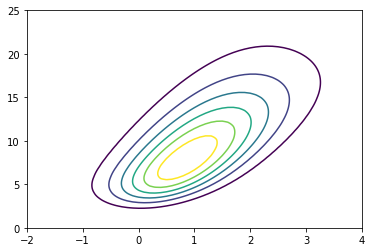

In [9]:
plt.figure()
CS = plt.contour(ALPHA,BETA,p)
plt.xlim((-2,4))
plt.ylim((0,25))

In [10]:
alpha_marg = np.mean(p,axis=0)
beta_marg = np.mean(p,axis=1)

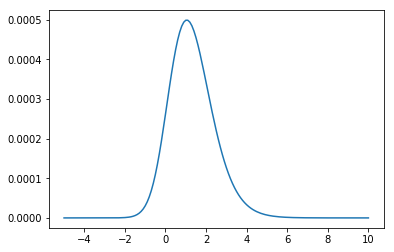

In [11]:
plt.plot(alpha,alpha_marg)

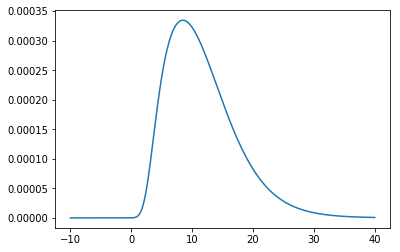

In [12]:
plt.plot(beta, beta_marg)